# Predictive Modeling for Song Popularity

## Business Understanding
- **Objective**: The primary goal is here to develop a model to predict song popularity. This model will assist stakeholders in the music industry, such as producers and marketers, in making informed decisions regarding artist signings, song selections, marketing strategies, and promotional activities.

## Data Understanding
- **Data Collection**: Acquired a comprehensive dataset from Spotify, featuring a wide array of tracks along with their features and popularity scores.
- **Exploratory Data Analysis (EDA)**: Conducted an in-depth analysis to examine the distributions of various features and the target popularity scores. Also investigated the relationships between different features and how they correlate with the popularity scores.

## Data Preparation
- **Data Cleaning**: Addressed missing values and removed irrelevant columns to enhance the quality and relevance of the data.
- **Feature Engineering**: Implemented cyclical and one-hot encoding for categorical features to improve model interpretability. Applied power transformations on continuous features to normalize distributions for the linear models, to ensure that the model's assuptions are met.

## Modelling
- **Approach**: Explored both regression and classification models to determine the most suitable approach for predicting song popularity. 
- **Class Imbalance Solutions**: Utilized techniques such as SMOTE and undersampling for the class imbalance issue, ensuring that the model performs well across all classes.
- **Model Selection and Optimization**: After identifying challenges with regression models, with how they were overfitting with low R² values, focused towards classification models. Used traditional machine learning models like Random Forest and XGBoost, and fine-tuned them using RandomizedSearchCV to achieve optimal performance.

## Evaluation
- **Model Evaluation**: Evaluated the models' performance thoroughly to find the best model close to being a generalized model (having low bias and low variance).
- **Feature Importance Analysis**: Conducted an analysis to find the features that significantly influence song popularity, informing future feature selection and engineering efforts.

## Deployment
- **Strategic Recommendations**: Provided actionable insights and data-driven recommendations to stakeholders in the music industry, aiming to use the predictive model for strategic planning.
- **Future Directions**: Emphasized the importance of exploring more sophisticated modeling techniques (deep learning) and integrating additional data sources to further enhance model insights and performance.

## Conclusion
This project, guided by the CRISP-DM methodology, underscores the transformative potential of predictive modeling in the music industry. It highlights the necessity for agility and continuous adaptation to new musical trends and consumer preferences, paving the way for more strategic and informed decision-making processes.

# Outline:

    Notebook - 1*: (Part_A.ipynb)
    I.    Importing the dataset
    II.   Data Cleaning 
    III.  Exploratory Data Analysis (EDA) 
    IV.   Popularity Prediction using Regression
    
    Notebook - 2*: (Part_B.ipynb)
    IV.   Popularity Prediction using Classification - Oversampling
    
    Notebook - 3*: (Part_C.ipynb)
    IV.   (Continued) Popularity Prediction using Classification - Undersampling
    V.    Result comparison between Regression vs Classification 
    VI.   Conclusion
 
_* Used 3 notebooks here since the runtime of each models were computationaly expensive (if I wanted to undo some deletion, I'd have to run the whole notebook again)_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import KFold

# I. Importing the dataset

Dataset: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset

In [2]:
df = pd.read_csv("dataset.csv")

In [3]:
df.shape

(114000, 21)

In [4]:
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [6]:
#Categorial Features
df.select_dtypes(include = ['object','bool']).columns.tolist()

['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']

In [7]:
#Numerical Features
df.select_dtypes(include = ['float','int']).columns.tolist()

['Unnamed: 0',
 'popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

# II. Data Cleaning

Removing "Unnamed: 0": since these are just the index columns 

In [8]:
del df['Unnamed: 0']

## 1. Checking if there's any missing values for all columns:

In [9]:
values_missing = df.isnull().sum()
print(values_missing)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [10]:
#Percentage of missing values per feature
np.round(df.isna().sum() / len(df) *100, 4)

track_id            0.0000
artists             0.0009
album_name          0.0009
track_name          0.0009
popularity          0.0000
duration_ms         0.0000
explicit            0.0000
danceability        0.0000
energy              0.0000
key                 0.0000
loudness            0.0000
mode                0.0000
speechiness         0.0000
acousticness        0.0000
instrumentalness    0.0000
liveness            0.0000
valence             0.0000
tempo               0.0000
time_signature      0.0000
track_genre         0.0000
dtype: float64

Since the missing values in each of the 3 columns (artists, album_name, track_name) are 0.0009% (very less signficant percentage of our dataset), removing the rows containing the missing values.

In [11]:
df.shape

(114000, 20)

In [12]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [13]:
df.shape

(113999, 20)

## 2. Checking the data types of all the columns

In [14]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

From the hugging face, description, let's check on the continous and the categorical data: 

1. *Categorical Variables*:
    * track_id: Although it's numerical in format, it acts like a nominal categorical variable because it's a unique identifier for each track.
    * artists: Nominal, as it represents names of artists.
    * album_name: Nominal, for the names of albums.
    * explicit: Nominal, indicates if a track has explicit content or not (yes/no).
    * key: Nominal, although represented by integers, these map to musical keys which are categories.
    * mode: Nominal, indicates the modality (major or minor) of a track.
    * time_signature: Nominal, despite being numerical, it indicates specific categories of time signatures in music.
    * track_genre: Nominal, represents the genre categories.

2. *Continous Variables*:
    * popularity: Continuous, it's a score that can range between 0 and 100.
    * duration_ms: Continuous, represents the length of a track in milliseconds.
    * danceability: Continuous, ranges from 0.0 to 1.0.
    * energy: Continuous, ranges from 0.0 to 1.0.
    * loudness: Continuous, it's measured in decibels (dB).
    * speechiness: Continuous, ranges from 0.0 to 1.0.
    * acousticness: Continuous, ranges from 0.0 to 1.0.
    * instrumentalness: Continuous, ranges from 0.0 to 1.0.
    * liveness: Continuous, ranges from 0.0 to 1.0.
    * valence: Continuous, ranges from 0.0 to 1.0.
    * tempo: Continuous, measured in beats per minute (BPM).

In [15]:
for col in ['key', 'mode', 'time_signature']:
        df[col] = df[col].astype('object')

Since they are categorical features, converting them to object type.

## 3. Checking if there are any duplicate rows

In [16]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 450


There are 450 rows that are repeated, dropping these rows to maintain data integrity.

In [17]:
#Removing the duplicate rows while keeping the first occurence of each duplicate
df = df.drop_duplicates() 

In [18]:
df.shape

(113549, 20)

## 4. Performing some Data Integrity Checks

### 4.1  Getting summary statistics for numerical columns (to understand the range intervals)

In [19]:
df.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,-8.243408,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745
std,22.283855,1.064131e+05,0.173409,0.251053,5.011422,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954
min,0.000000,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,-9.998000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000
50%,35.000000,2.130000e+05,0.580000,0.685000,-6.997000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000
75%,50.000000,2.615880e+05,0.695000,0.854000,-5.001000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


From above:
* We can see that the Popularity score is correctly bounded from 0-100. 
* Duration has no negative values.
* Also noticed Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, and Time Signature all have their own ranges and distributions. 

### 4.2 Checking if the 'explicit' column contains boolean values

In [20]:
invalid_explicit = df[~df['explicit'].isin([0, 1, False, True])]
print(f"Rows with invalid explicit flag: {len(invalid_explicit)}")

Rows with invalid explicit flag: 0


## 5. Checking the unique categories in each categorical variable

In [21]:
unique_key_categories = df['key'].nunique()
unique_mode_categories = df['mode'].nunique()
unique_track_genre_categories = df['track_genre'].nunique()
unique_time_signature_categories = df['time_signature'].nunique()

In [22]:
(unique_key_categories, unique_mode_categories, unique_track_genre_categories, unique_time_signature_categories)

(12, 2, 114, 5)

# III. Exploratory Data Analysis: 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  object 
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  object 
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           113549 

In [24]:
sns.set(style="whitegrid") #Setting style

## 1. Numerical Feature Distribution

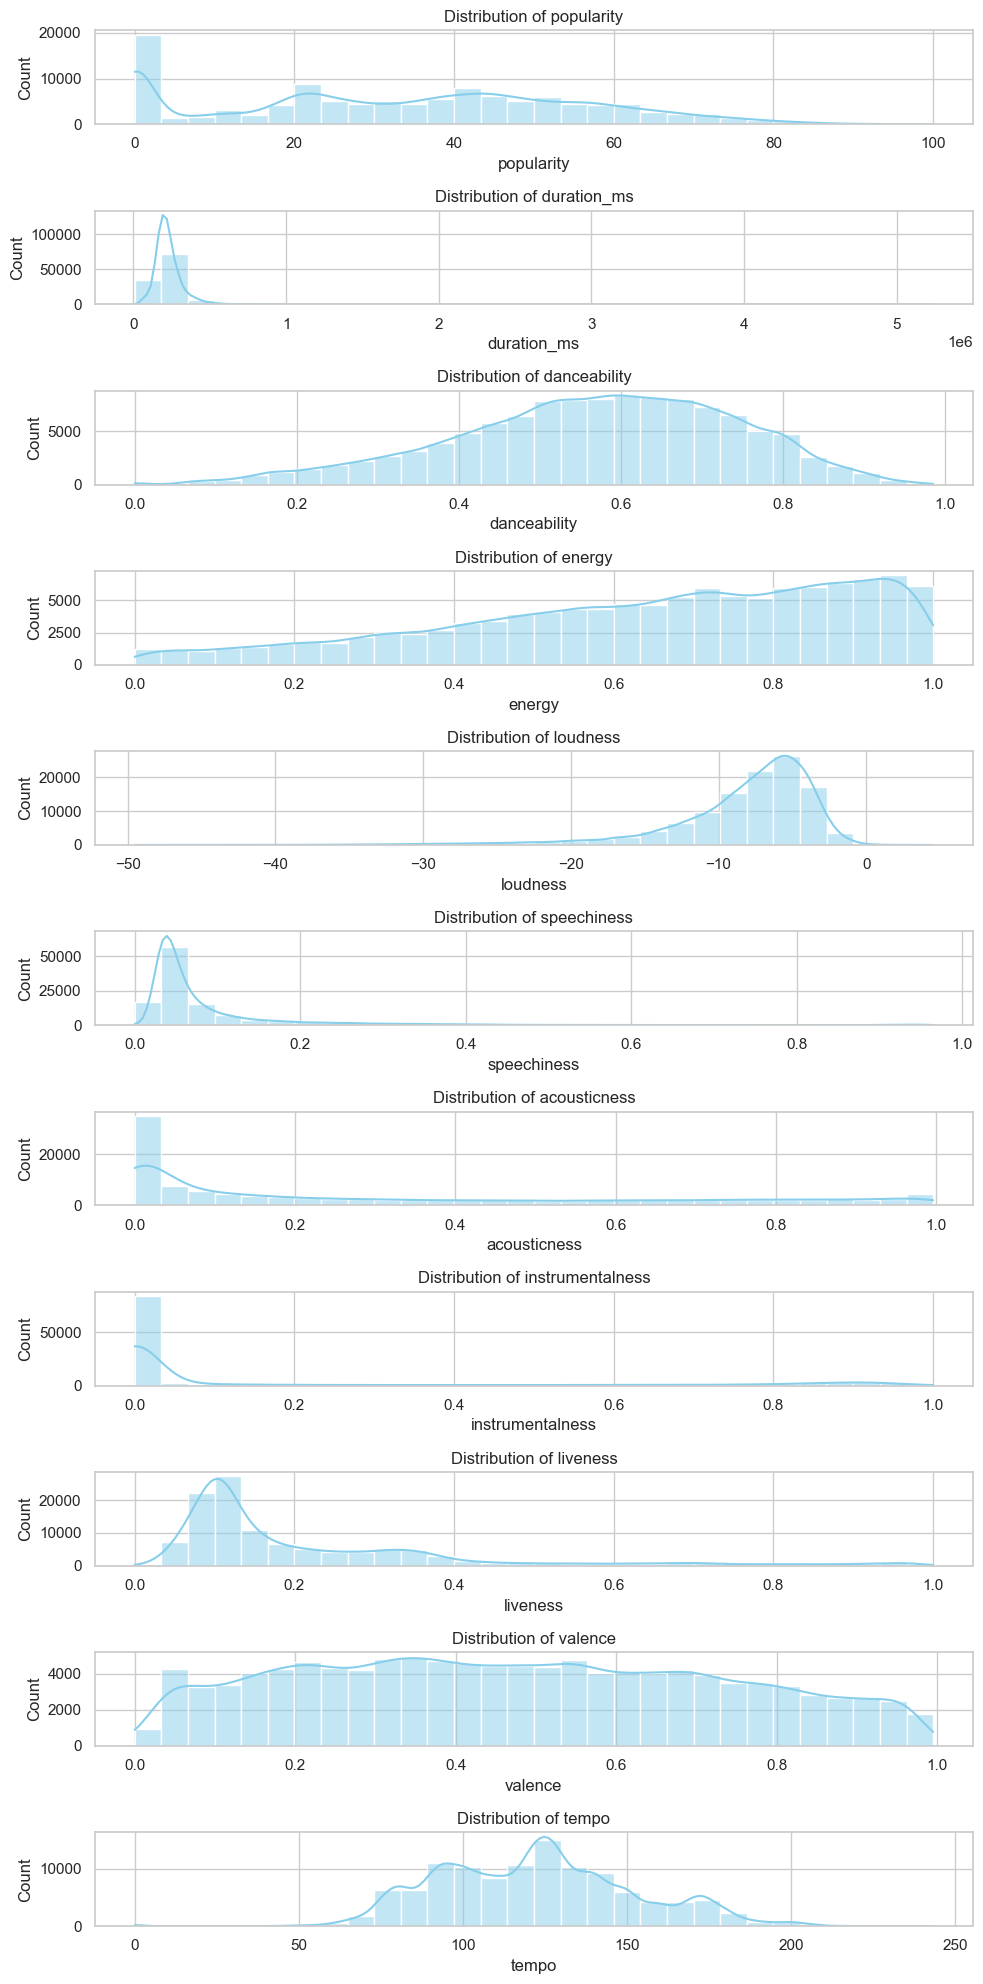

In [25]:
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy',
                      'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo']
fig, ax = plt.subplots(len(numerical_features), 1, figsize=(10, 20))
#Plotting distributions with Kernel Density Estimate (KDE)
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=ax[i], kde=True, bins=30, color='skyblue')
    ax[i].set_title(f'Distribution of {feature}', fontsize=12)
plt.tight_layout()
plt.show()

### Insights from above:
- From above we see that the distribution of most of the numerical features are skewed (not normal distribution).
- For the popularity distribution, noticed that most of the songs are not very popular, it also has a lot of 0 values.

## 2. `track_genre` related EDA: 

### a. Total Songs per Genre (Checking for class imbalance):

In [26]:
song_counts_per_genre = df['track_genre'].value_counts().reset_index()
song_counts_per_genre.columns = ['track_genre', 'song_count']
song_counts_per_genre = song_counts_per_genre.sort_values(by='song_count', ascending=False)

In [27]:
song_counts_per_genre

,track_genre,song_count
0,acoustic,1000
26,singer-songwriter,1000
19,reggae,1000
20,techno,1000
21,songwriter,1000
...,...,...
109,honky-tonk,981
110,dance,965
111,german,963
112,classical,933


### Insights from above:
From above, we can see 114 genres with almost 1000 (max) or 904 (min) songs for each, indicating that there's no class imbalance for this categorical data.

### b. Average Popularity of Genres (Top 30)

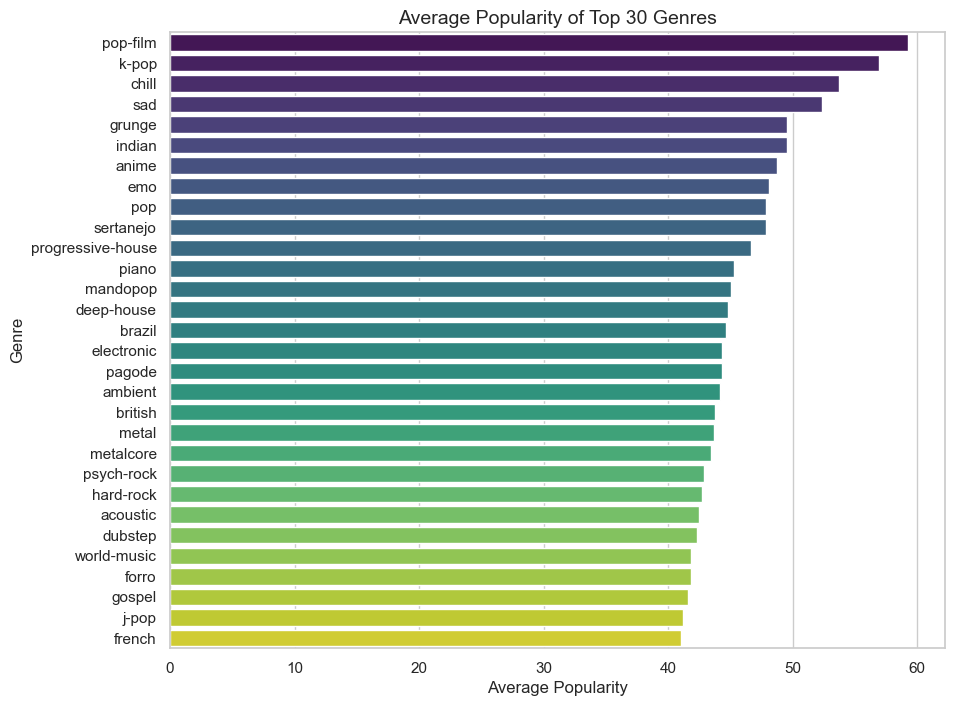

In [28]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)
top_n = 30
genre_popularity_top_n = genre_popularity.head(top_n)
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_popularity_top_n.values, y=genre_popularity_top_n.index, palette='viridis')  # Using a horizontal bar plot
plt.title('Average Popularity of Top 30 Genres', fontsize=14)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

### Insights from above:
Performed this EDA to see the top 30 popular genres. Exploring to see which top genres contribute to popularity. 

## 3. Top 30 Popular Artists

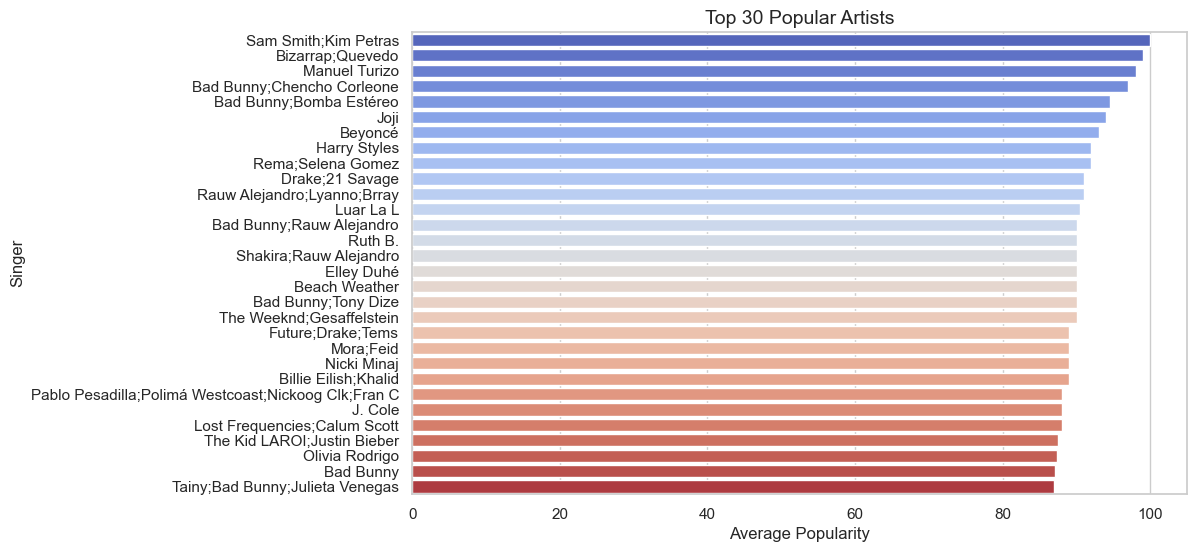

In [29]:
top_singers = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_singers.values, y=top_singers.index, palette='coolwarm')
plt.title('Top 30 Popular Artists', fontsize=14)
plt.xlabel('Average Popularity', fontsize=12)
plt.ylabel('Singer', fontsize=12)
plt.show()

### Insights from above:
Performed this EDA to see the top 30 popular artists. Exploring to see which top artists contribute to popularity. 

## 4. Number of Songs per Artist vs. Popularity (Top 50 Artists)

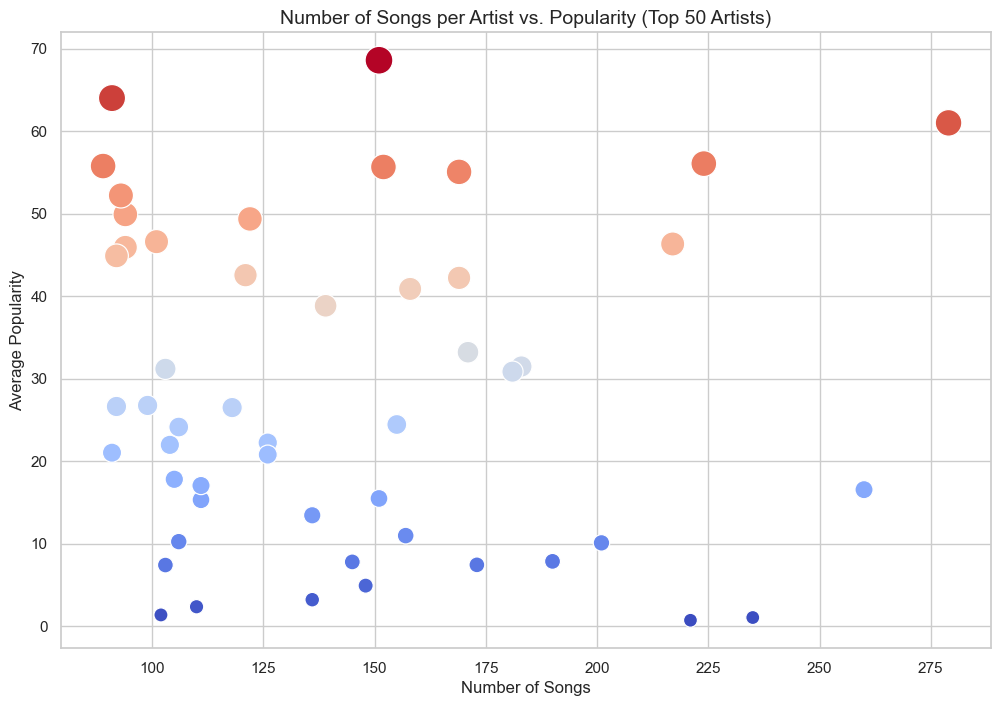

In [30]:
#Calculating the number of songs per artist
songs_per_artist = df['artists'].value_counts().reset_index()
songs_per_artist.columns = ['artists', 'song_count']

#Calculating the average popularity for each artist
average_popularity = df.groupby('artists')['popularity'].mean().reset_index()

#Merging the two DataFrames
artist_info = pd.merge(songs_per_artist, average_popularity, on='artists')

#Sorting by song count to focus on the top artists
top_artists = artist_info.sort_values(by='song_count', ascending=False).head(50)

#Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_artists, x='song_count', y='popularity', size='popularity', hue='popularity', palette='coolwarm', sizes=(100, 400), legend=False)
plt.title('Number of Songs per Artist vs. Popularity (Top 50 Artists)', fontsize=14)
plt.xlabel('Number of Songs', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.grid(True)
plt.show()

### Insights from above:
From the abve we see that, more songs (the artist has) doesn't necessarily mean more popularity.

## 5. `explicit` related EDA:

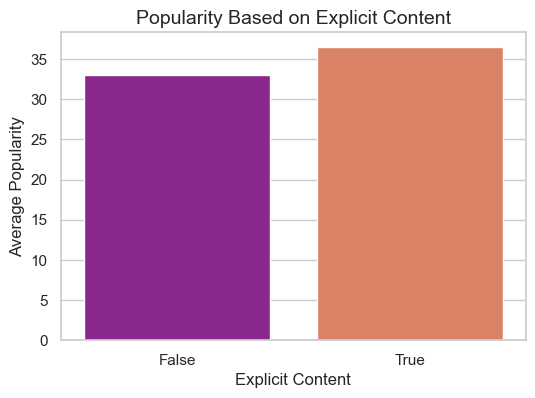

In [31]:
explicit_popularity = df.groupby('explicit')['popularity'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='explicit', y='popularity', data=explicit_popularity, palette='plasma')
plt.title('Popularity Based on Explicit Content', fontsize=14)
plt.xlabel('Explicit Content', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.show()

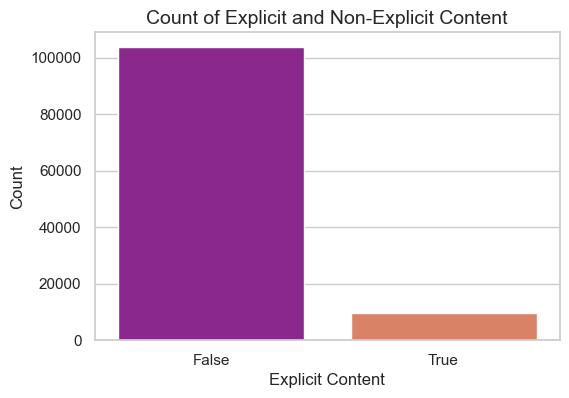

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='explicit', data=df, palette='plasma')
plt.title('Count of Explicit and Non-Explicit Content', fontsize=14)
plt.xlabel('Explicit Content', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### Insights from above: 
From the above 2 bar graphs, we can se that even though the number of explicit songs are less, they've more popularity than non-explicit songs.

## 6. Relationships between Musical Features and Popularity

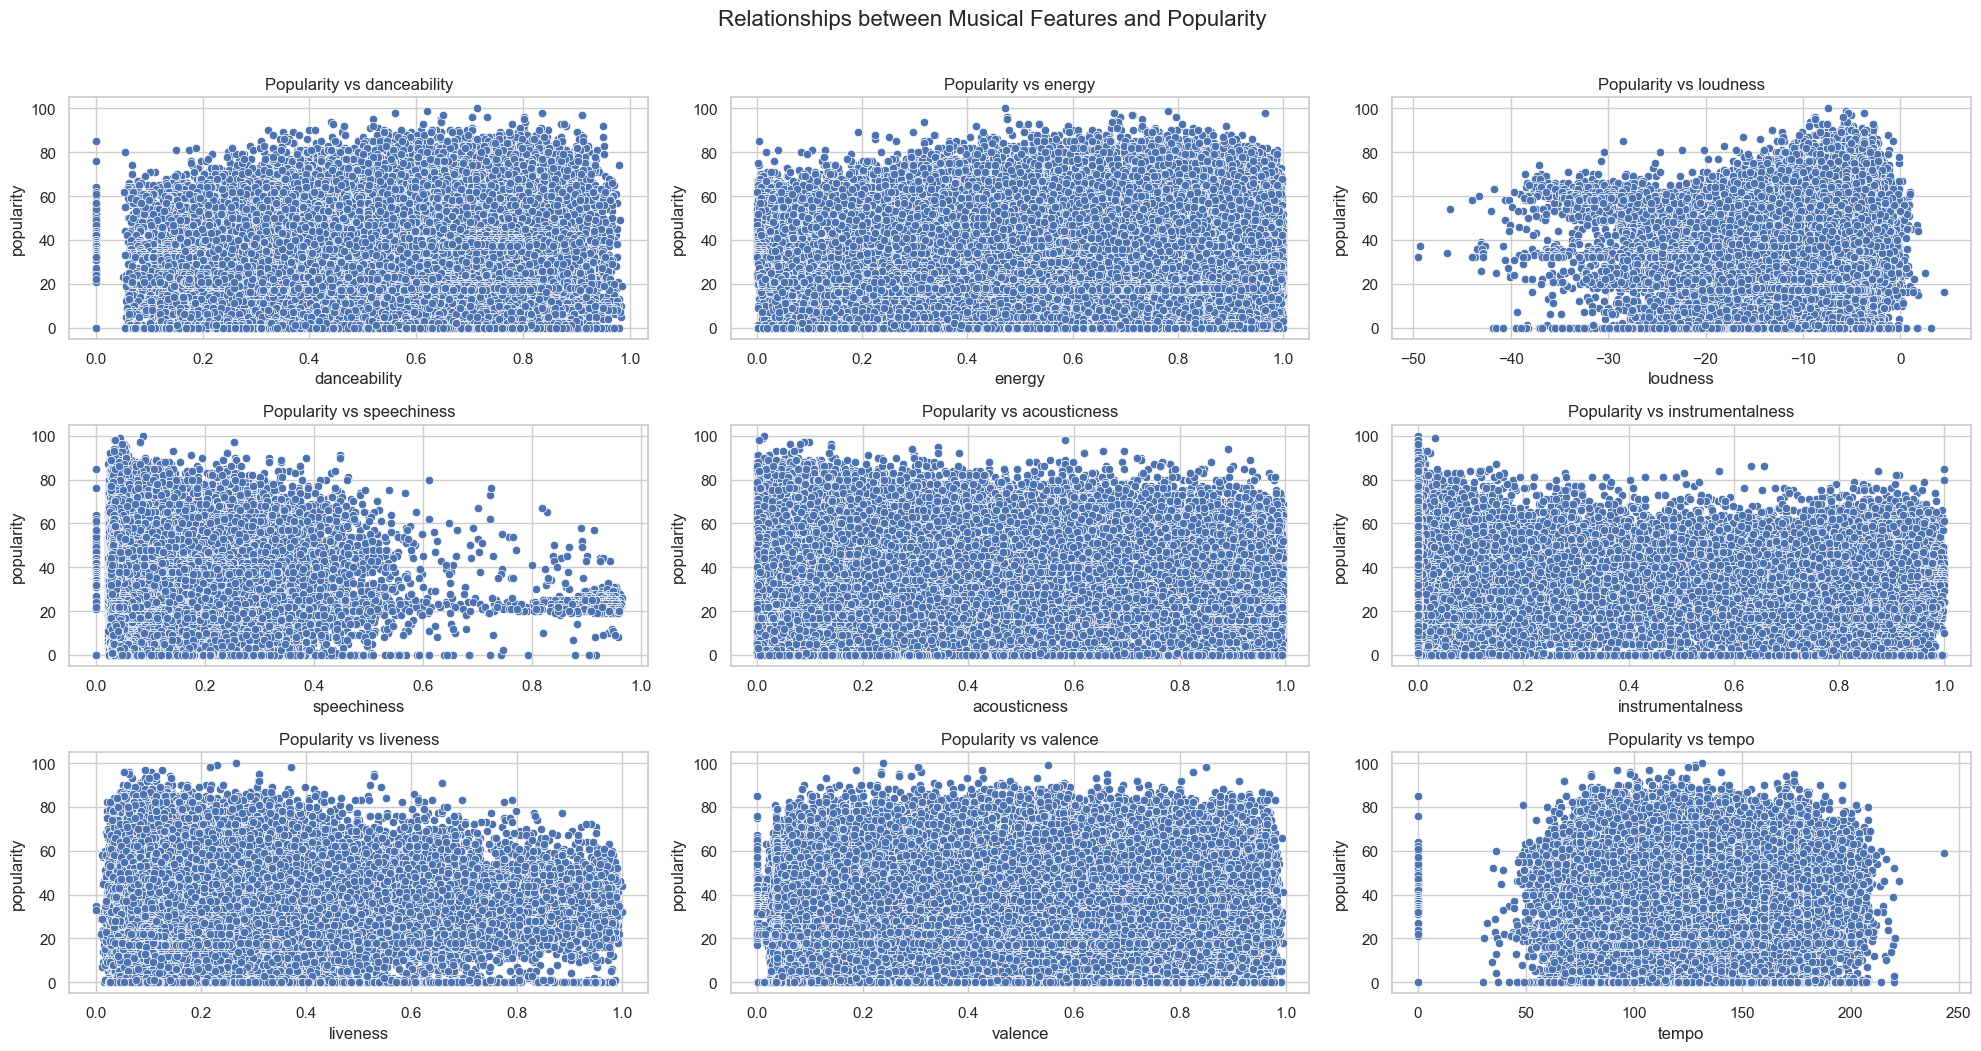

In [33]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i) 
    sns.scatterplot(x=feature, y='popularity', data=df, palette='Accent')
    plt.title(f'Popularity vs {feature}')
plt.tight_layout()
plt.suptitle('Relationships between Musical Features and Popularity', y=1.05, fontsize=16)
plt.show()

### Insights from above:
The scatter plots suggest that the relationships between the features and the popularity are not linear at all. 

## 7. Correlation Heatmap

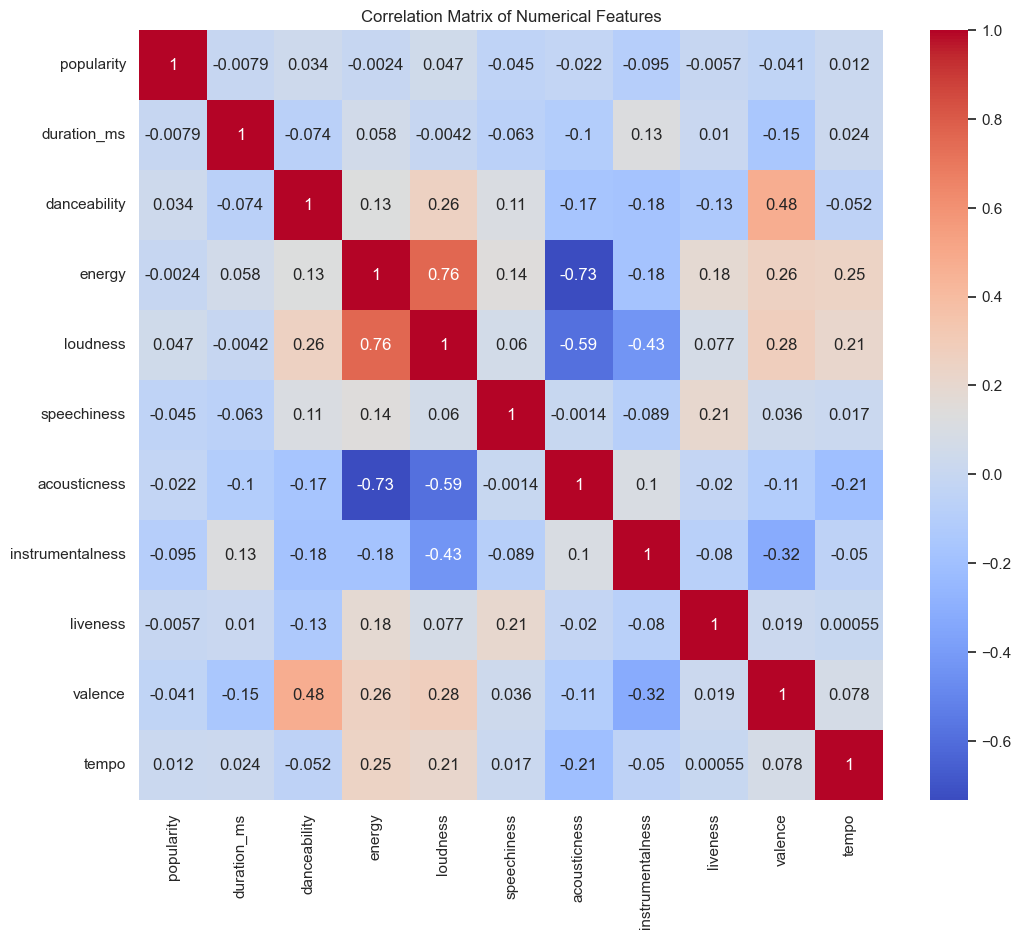

In [34]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Insights from above: 
There is no high/low correlation (>/< 0.8) between pairs of features. 

## 8. Checking for outliers (for numerical features): 

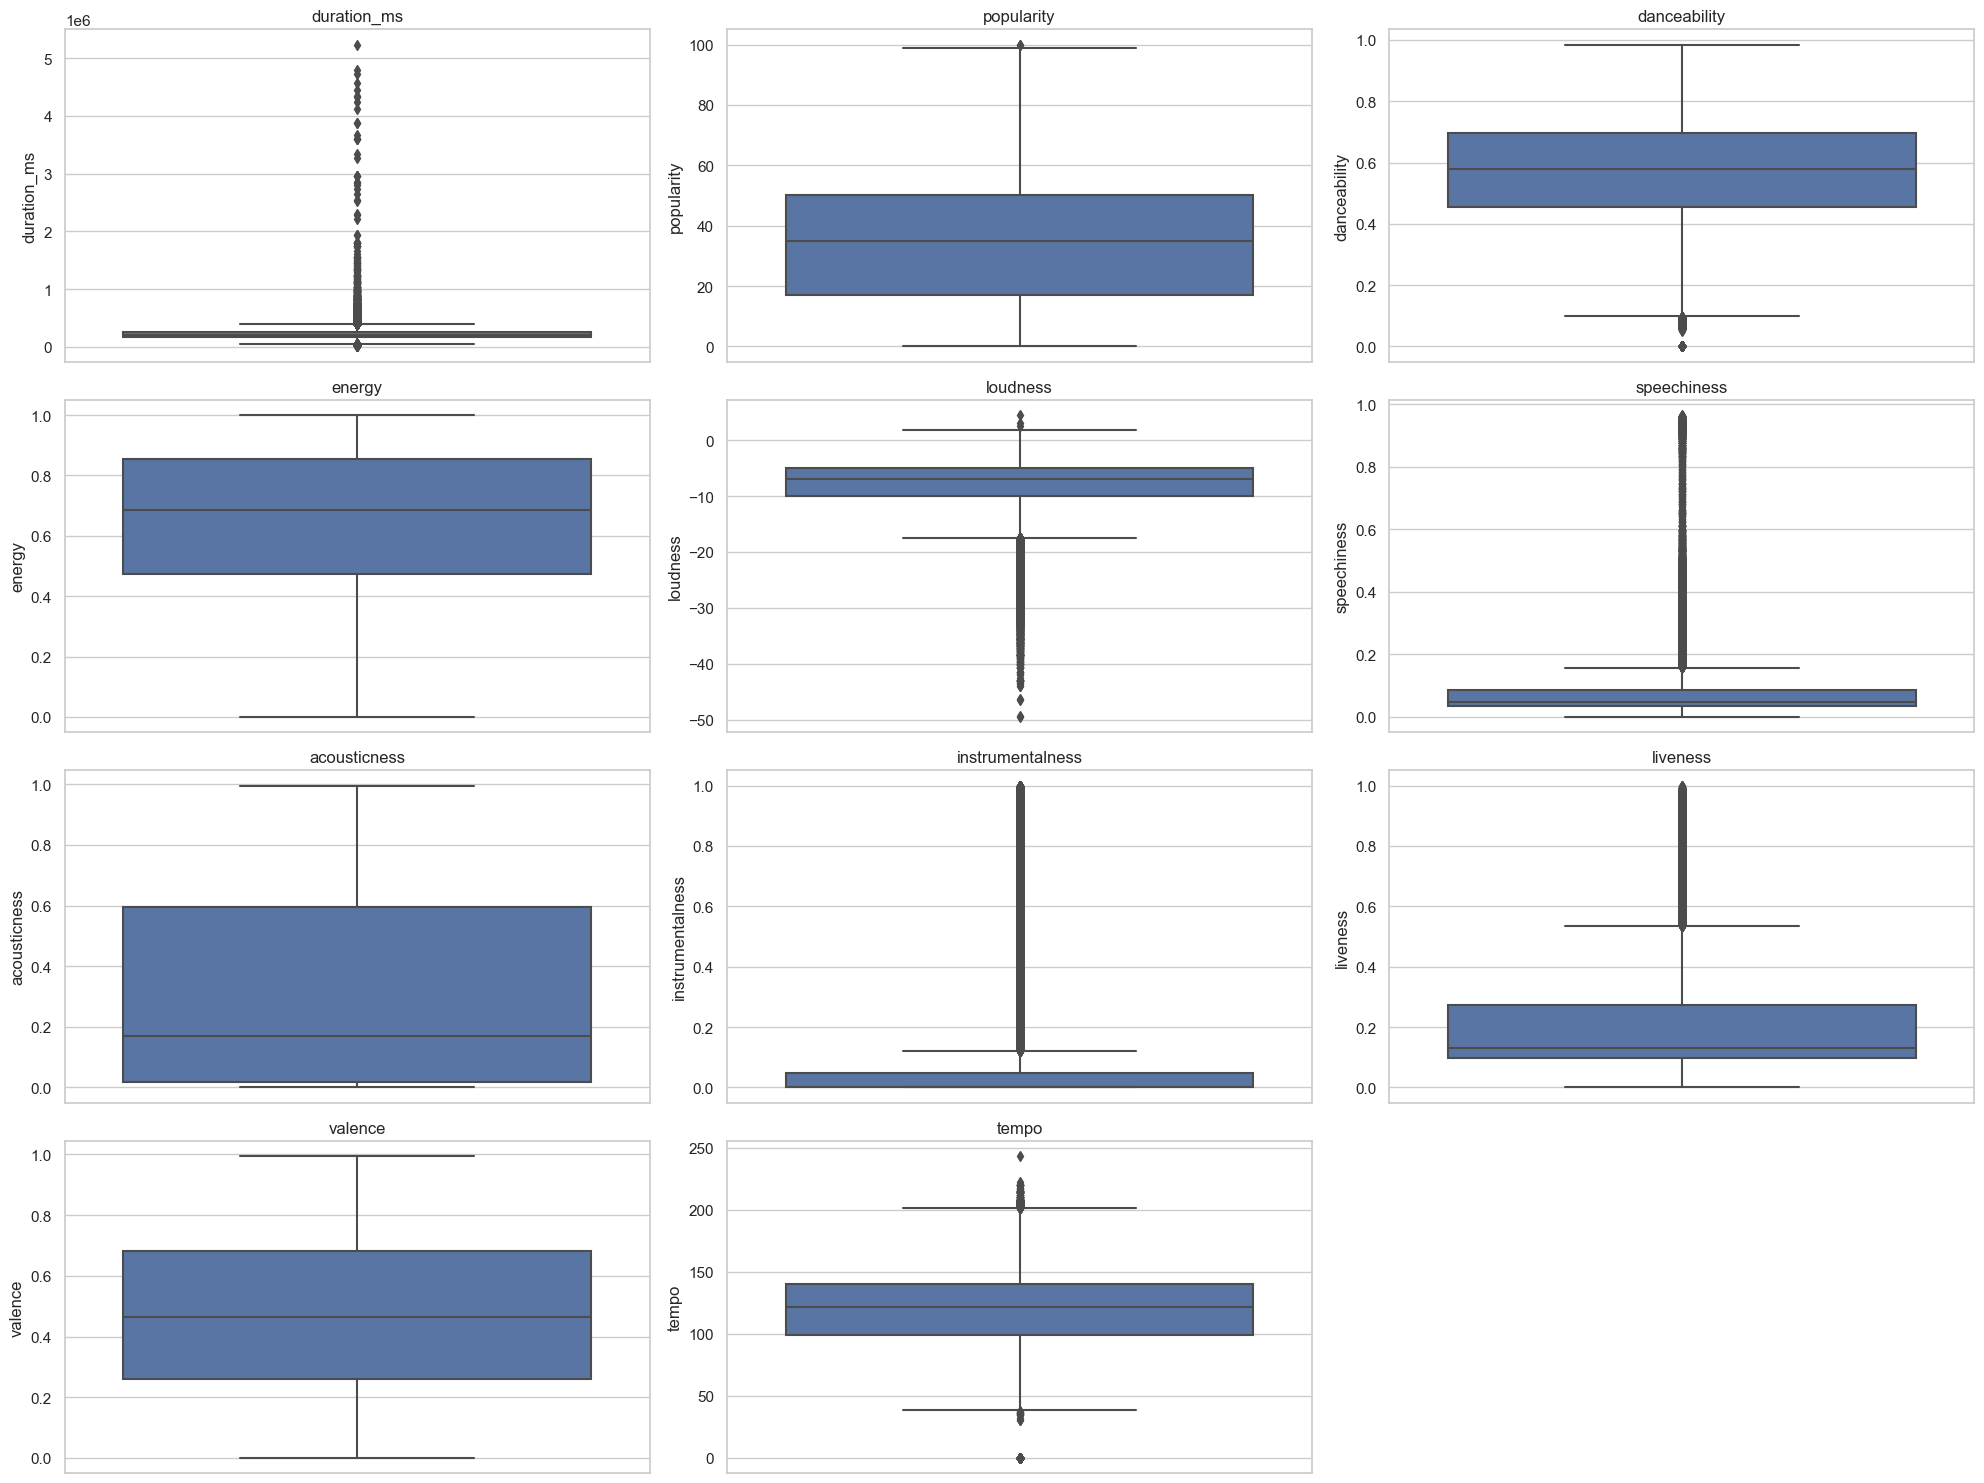

In [35]:
numercial_features = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
           'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20, 15))
for i, column in enumerate(numercial_features, 1):
    plt.subplot(4, 3, i)  
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.tight_layout()
plt.show()

### Insights from above:
In some features, we do see some outiers. But I will not removing any outliers as these features mainly are musical features and represent the song in a way, so removing them could potentially lead to loss of valuable data.

# IV. Popularity Prediction (using Regression)

## Approach: 
* From EDA (of Numerical Feature Distribution) we noticed, both numerical features and target variable exhibit skewness and the relationships between features and the target variable are non-linear. 
* I will be primarily using models capable of capturing non-linear relationships such as KNN, Decision Trees, Random Forest, AdaBoost and XGBoost. 
* But, I will not eliminate Linear, Lasso and Ridge Regression models just to see how these models are performing and can draw comparisions between the linear and non-linear models. For addressing skewness, I'll be be applying transformations. 
* Categorical features: 
    1. For 'key': Since the 'key' column is a cyclical feature (the musical key after G# / Ab is back to C, forming a cycle), I will be using sine and cosine transformation to preserve this cyclical nature. This reduces the number of features (if one-hot encoding is used) from 12 to 2. 
    2. For 'mode' and 'time signature': One-hot encoding. 
* For 'track_genre': With 114 unique categories, using one-hot encoding will increase the number of features significantly called the "Dimensionality Curse" as high dimensionality can lead to sparse data, which might affect model performance negatively. Other options I considered  for this was Label Encoding (but since it's not ordinal data, didn't proceed with it), tried target encoding too, but here the models were overfitting and during feature importance I observed the model was very reliant on this feature as the new target encoded feature leaked data. Hence, I will be dropping it for reducing the complexity and to keep it strictly song features as our independent variables and popularity as the dependent. 

## Feature Engineering for Categorical Features: 

In [36]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [37]:
#Cyclical encoding for 'key'
df['key'] = pd.to_numeric(df['key'], errors='coerce')
df['key_sin'] = np.sin((df['key'] * (2. * np.pi / 12)))
df['key_cos'] = np.cos((df['key'] * (2. * np.pi / 12)))

In [38]:
#One-Hot Encoding for 'mode' and 'time_signature'
df = pd.get_dummies(df, columns=['mode', 'time_signature'])

## Feature Engineering for Continous Features: 

Using power transformations - Yeo-Johnson, Box-cox, and traditional transformation (such as log) for normalizing our data. 

References used: 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html
* https://maths-people.anu.edu.au/~johnm/r-book/4edn/Ch2%263-powerTransforms.pdf

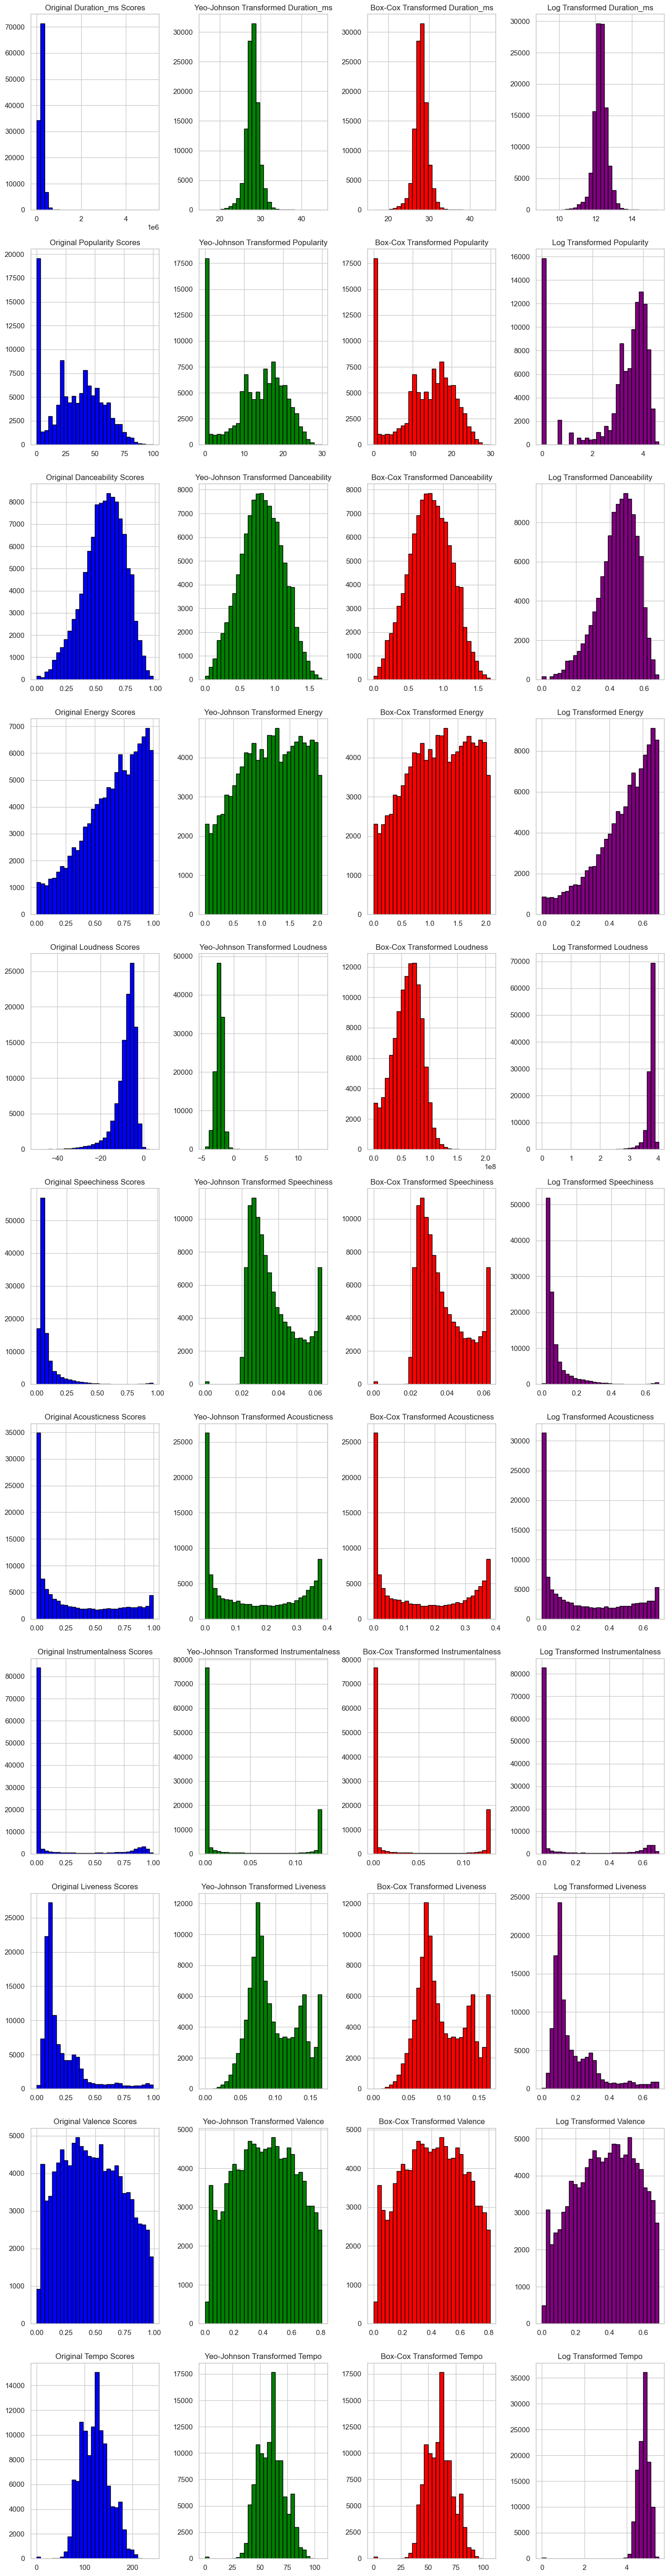

In [39]:
feature_names = ['duration_ms', 'popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                 'instrumentalness', 'liveness', 'valence', 'tempo']

#Applying transformations to each feature
for feature in feature_names:
    # Handle zero and negative values with Yeo-Johnson
    df[f'yeo_johnson_{feature}'], _ = stats.yeojohnson(df[feature])
    
    #fpr box_cox shiftting data to be strictly positive (when needed)
    min_val = df[feature].min()
    shift = 1 - min_val if min_val <= 0 else 0
    df[f'box_cox_{feature}'], _ = stats.boxcox(df[feature] + shift)
    
    #Log Transformation
    shifted_value = df[feature] + (-min_val + 1) if min_val <= 0 else df[feature]
    df[f'log_{feature}'] = np.log(shifted_value)

#Plotting the results for each transformation
num_features = len(feature_names)
plt.figure(figsize=(18, num_features * 5)) 

for i, feature in enumerate(feature_names, 1):
    #Original distribution
    plt.subplot(num_features, 5, (i-1)*5 + 1)
    plt.hist(df[feature], bins=30, color='blue', edgecolor='black')
    plt.title(f'Original {feature.capitalize()} Scores')
    
    #Log transformed distribution
    plt.subplot(num_features, 5, (i-1)*5 + 4)
    plt.hist(df[f'log_{feature}'], bins=30, color='purple', edgecolor='black')
    plt.title(f'Log Transformed {feature.capitalize()}')
    
    #Yeo-Johnson transformed distribution
    plt.subplot(num_features, 5, (i-1)*5 + 2)
    plt.hist(df[f'yeo_johnson_{feature}'], bins=30, color='green', edgecolor='black')
    plt.title(f'Yeo-Johnson Transformed {feature.capitalize()}')
    
    #Box-Cox transformed distribution
    plt.subplot(num_features, 5, (i-1)*5 + 3)
    plt.hist(df[f'box_cox_{feature}'], bins=30, color='red', edgecolor='black')
    plt.title(f'Box-Cox Transformed {feature.capitalize()}')
    
plt.tight_layout()
plt.show()

In [40]:
metrics = []

#Shapiro-Wilk test, skewness and kurtosis for each transformation
for feature in feature_names:
    for transformation in ['yeo_johnson_', 'box_cox_', 'log_']:
        transformed_feature = f'{transformation}{feature}'
        shapiro_test_stat, shapiro_p_value = stats.shapiro(df[transformed_feature])
        skewness = stats.skew(df[transformed_feature])
        kurtosis = stats.kurtosis(df[transformed_feature])
        
        metrics.append({
            'Feature': feature,
            'Transformation': transformation[:-1],
            'Shapiro-Wilk Stat': shapiro_test_stat,
            'Shapiro-Wilk p-value': shapiro_p_value,
            'Skewness': skewness,
            'Kurtosis': kurtosis
        })

metrics_df = pd.DataFrame(metrics)

In [41]:
metrics_df

,Feature,Transformation,Shapiro-Wilk Stat,Shapiro-Wilk p-value,Skewness,Kurtosis
0,duration_ms,yeo_johnson,0.964088,0.000000e+00,0.055500,3.875514
1,duration_ms,box_cox,0.964085,0.000000e+00,0.055503,3.875560
2,duration_ms,log,0.961685,0.000000e+00,-0.319599,3.423223
3,popularity,yeo_johnson,0.932288,0.000000e+00,-0.432327,-0.845975
4,popularity,box_cox,0.932288,0.000000e+00,-0.432327,-0.845975
5,popularity,log,0.749224,0.000000e+00,-1.358234,0.391903
6,danceability,yeo_johnson,0.996276,5.011043e-42,-0.043896,-0.460834
7,danceability,box_cox,0.996276,5.011043e-42,-0.043896,-0.460834
8,danceability,log,0.968077,0.000000e+00,-0.703304,0.347877
9,energy,yeo_johnson,0.964456,0.000000e+00,-0.167510,-1.040631


### Insights from above:
Yeo-Johnson and Box-Cox transformations generally perform better than logarithmic transformation in normalizing data, as seen above by higher Shapiro-Wilk statistics, close to zero skewness across various features. 
Yeo-Johnson is more versatile, handling zero and negative values, making it preferable for this dataset. Box-Cox requires strictly positive values, need's some pre-processing. Given this, I will be going with Yeo-Johnson for effective normalization.

In [42]:
#Deleting the log and boxcox transformed features
for feature in feature_names:
    log_col_name = f'log_{feature}'
    if log_col_name in df.columns:
        df.drop(log_col_name, axis=1, inplace=True)
    box_cox_col_name = f'box_cox_{feature}'
    if box_cox_col_name in df.columns:
        df.drop(box_cox_col_name, axis=1, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   track_id                      113549 non-null  object 
 1   artists                       113549 non-null  object 
 2   album_name                    113549 non-null  object 
 3   track_name                    113549 non-null  object 
 4   popularity                    113549 non-null  int64  
 5   duration_ms                   113549 non-null  int64  
 6   explicit                      113549 non-null  bool   
 7   danceability                  113549 non-null  float64
 8   energy                        113549 non-null  float64
 9   key                           113549 non-null  int64  
 10  loudness                      113549 non-null  float64
 11  speechiness                   113549 non-null  float64
 12  acousticness                  113549 non-null  fl

## Linear Modelling: 

### Feature Selection
* Normalized Continuous Features (Yeo-johnson transformation)
* Encoded Categorical Features such as Cyclical Encoding for 'key', one-hot encoding for 'mode' and 'time signature' 
* We will use the explicit feature as well.

In [44]:
df_linear = df

In [45]:
linear_model_columns = [
    'popularity', #Target variable
    'yeo_johnson_duration_ms', 
    'yeo_johnson_danceability',
    'yeo_johnson_energy',
    'yeo_johnson_loudness',
    'yeo_johnson_speechiness',
    'yeo_johnson_acousticness',
    'yeo_johnson_instrumentalness',
    'yeo_johnson_liveness',
    'yeo_johnson_valence',
    'yeo_johnson_tempo',
    'key_sin', 
    'key_cos', 
    'mode_0', 
    'mode_1', 
    'time_signature_0', 
    'time_signature_1', 
    'time_signature_3', 
    'time_signature_4', 
    'time_signature_5',
    'explicit'
]

df_linear = df_linear[linear_model_columns]

In [46]:
df_linear

,popularity,yeo_johnson_duration_ms,yeo_johnson_danceability,yeo_johnson_energy,yeo_johnson_loudness,yeo_johnson_speechiness,yeo_johnson_acousticness,yeo_johnson_instrumentalness,yeo_johnson_liveness,yeo_johnson_valence,...,key_sin,key_cos,mode_0,mode_1,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5,explicit
0,73,28.315275,0.994425,0.666416,-2.182951,0.055781,0.030742,0.000001,0.141143,0.609582,...,0.500000,0.866025,True,False,False,False,False,True,False,False
1,55,26.461343,0.540308,0.190952,-3.181441,0.043563,0.371492,0.000006,0.073318,0.249548,...,0.500000,0.866025,False,True,False,False,False,True,False,False
2,57,27.922186,0.569047,0.480880,-2.557178,0.036464,0.159471,-0.000000,0.081132,0.116232,...,0.000000,1.000000,False,True,False,False,False,True,False,False
3,71,27.735319,0.313592,0.062736,-3.262851,0.027287,0.368661,0.000071,0.087786,0.137707,...,0.000000,1.000000,False,True,False,False,True,False,False,False
4,82,27.668908,0.882880,0.631968,-2.551443,0.035181,0.271426,-0.000000,0.063474,0.159861,...,0.866025,0.500000,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,30.636892,0.191723,0.285805,-3.124912,0.030385,0.318626,0.129199,0.065411,0.033586,...,0.500000,-0.866025,False,True,False,False,False,False,True,False
113996,22,30.636905,0.194188,0.129254,-3.250654,0.029316,0.381250,0.129343,0.075345,0.034666,...,0.000000,1.000000,True,False,False,False,False,True,False,False
113997,22,29.037988,0.903640,0.430691,-2.676564,0.030285,0.362742,-0.000000,0.064048,0.630240,...,0.000000,1.000000,True,False,False,False,False,True,False,False
113998,41,29.239095,0.825364,0.755819,-2.675975,0.023452,0.240207,-0.000000,0.127749,0.373696,...,-0.500000,-0.866025,False,True,False,False,False,True,False,False


In [47]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   popularity                    113549 non-null  int64  
 1   yeo_johnson_duration_ms       113549 non-null  float64
 2   yeo_johnson_danceability      113549 non-null  float64
 3   yeo_johnson_energy            113549 non-null  float64
 4   yeo_johnson_loudness          113549 non-null  float64
 5   yeo_johnson_speechiness       113549 non-null  float64
 6   yeo_johnson_acousticness      113549 non-null  float64
 7   yeo_johnson_instrumentalness  113549 non-null  float64
 8   yeo_johnson_liveness          113549 non-null  float64
 9   yeo_johnson_valence           113549 non-null  float64
 10  yeo_johnson_tempo             113549 non-null  float64
 11  key_sin                       113549 non-null  float64
 12  key_cos                       113549 non-null  fl

Here, using dummy variable trap -> Dropping one dummy variable from each set of dummies (removing mode_0, time_signature_0):

_https://www.learndatasci.com/glossary/dummy-variable-trap/_

In [48]:
#Dropping one dummy variable from each set to avoid the dummy variable trap
df_linear.drop(['mode_0', 'time_signature_0'], axis=1, inplace=True)

In [49]:
#Converting bool to int
boolean_columns = ['mode_1', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5', 'explicit']
df_linear[boolean_columns] = df_linear[boolean_columns].astype(int)

### Checking for Multicollinearity 

#### Variance Inflation Factor (VIF) Approach: 
(https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)
    
   * The VIF approach quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity. VIF values are calculated for each feature in a model that includes all other features. A high VIF value indicates that the feature is highly collinear with other features in the model.
   * This method is chosen here over the correlation matrix approach because it considers the multicollinearity of a feature with all other features simultaneously rather than just pairwise correlations.
   * VIF <= 5, acceptable level of collinearity.

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
 
#Adding a constant term for the intercept (required for VIF calculation)
df_with_const = add_constant(df_linear.drop(['popularity'], axis=1)) #Since popularity is target, removing it

vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns[1:]  #Excluding the constant term for VIF display
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(1, df_with_const.shape[1])]

#Sortting and displaying the VIF values in descending order (to highlight multicollinearity)
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                         Feature        VIF
15              time_signature_4  70.530009
14              time_signature_3  55.438118
16              time_signature_5  12.518200
13              time_signature_1   7.174688
2             yeo_johnson_energy   3.916458
3           yeo_johnson_loudness   2.786547
5       yeo_johnson_acousticness   2.150957
8            yeo_johnson_valence   1.622274
1       yeo_johnson_danceability   1.549732
6   yeo_johnson_instrumentalness   1.361313
4        yeo_johnson_speechiness   1.315125
9              yeo_johnson_tempo   1.136983
17                      explicit   1.125523
7           yeo_johnson_liveness   1.104415
0        yeo_johnson_duration_ms   1.102856
12                        mode_1   1.030575
10                       key_sin   1.008742
11                       key_cos   1.006254


#### Insights from above: 
We see that time_signature_4 column is highly correlated, hence removing time_signature_4 first and then checking the VIF scores for all the features:

In [51]:
del df_linear['time_signature_4']

In [52]:
#Calculating the VIF scores again:
df_with_const = add_constant(df_linear.drop(['popularity'], axis=1))
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns[1:]  
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(1, df_with_const.shape[1])]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

                         Feature       VIF
2             yeo_johnson_energy  3.915696
3           yeo_johnson_loudness  2.786180
5       yeo_johnson_acousticness  2.145727
8            yeo_johnson_valence  1.622229
1       yeo_johnson_danceability  1.538864
6   yeo_johnson_instrumentalness  1.360255
4        yeo_johnson_speechiness  1.307045
16                      explicit  1.125105
14              time_signature_3  1.112229
9              yeo_johnson_tempo  1.104736
7           yeo_johnson_liveness  1.103305
0        yeo_johnson_duration_ms  1.096144
15              time_signature_5  1.033330
12                        mode_1  1.030475
13              time_signature_1  1.019147
10                       key_sin  1.008564
11                       key_cos  1.006091


#### Insights from above: 
By removing the time_signature_4 feature and observing that all remaining features have VIF values < 5, we have successfully reduced multicollinearity in the dataset. 

### Model Building (Linear, Lasso & Ridge):

In [53]:
df_linear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   popularity                    113549 non-null  int64  
 1   yeo_johnson_duration_ms       113549 non-null  float64
 2   yeo_johnson_danceability      113549 non-null  float64
 3   yeo_johnson_energy            113549 non-null  float64
 4   yeo_johnson_loudness          113549 non-null  float64
 5   yeo_johnson_speechiness       113549 non-null  float64
 6   yeo_johnson_acousticness      113549 non-null  float64
 7   yeo_johnson_instrumentalness  113549 non-null  float64
 8   yeo_johnson_liveness          113549 non-null  float64
 9   yeo_johnson_valence           113549 non-null  float64
 10  yeo_johnson_tempo             113549 non-null  float64
 11  key_sin                       113549 non-null  float64
 12  key_cos                       113549 non-null  fl

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [55]:
#Features
X = df_linear.drop('popularity', axis=1)
#Target
y = df_linear['popularity']

#Splitting the data into training (70%) and testing sets (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
#Function to evaluate model on training and testing sets
def evaluate_model(model, X_train, X_test, y_train, y_test):
    #Scaling the data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model.fit(X_train_scaled, y_train)
    train_pred = model.predict(X_train_scaled)
    test_pred = model.predict(X_test_scaled)
    
    #Computing the train & test of rmse and r² 
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

In [57]:
#Linear models
linear_models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=0),
    "Ridge": Ridge(random_state=0),
}

#Dictionary to store results
results = {
    "Model": [],
    "Training RMSE": [],
    "Test RMSE": [],
    "Training R²": [],
    "Test R²": []
}

In [58]:
#Evaluating each model and storing results
for name, model in linear_models.items():
    train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(model, X_train, X_test, y_train, y_test)

    results["Model"].append(name)
    results["Training RMSE"].append(train_rmse)
    results["Test RMSE"].append(test_rmse)
    results["Training R²"].append(train_r2)
    results["Test R²"].append(test_r2)

#Converting results to a DataFrame for display
results_df = pd.DataFrame(results)

In [59]:
results_df

,Model,Training RMSE,Test RMSE,Training R²,Test R²
0,Linear Regression,21.986448,21.924551,0.028098,0.028178
1,Lasso,22.193663,22.132353,0.009692,0.009669
2,Ridge,21.986448,21.924551,0.028098,0.028178


### Insights from above: 
* As expected, the Linear models are not predicting the popularity correctly. 
* With Test R² = 0.028 meaning 2.8% accuracy on the models and root mean sqaured errors is almost 22 (High error considering the popularity scale is 0-100). 
* Hence, as intended, I will focus on non-linear models. 

## Non-Linear Modelling: 

Will be evaluating models such as KNN, Decision Trees, Random Forest, AdaBoost and XGBoost.

_NOTE: Tried for Support Vector Regressor as well but it took 1.5h+ with poor results, so in my newer iterations of running the models, have excluded it_

###  Model Building Approach:
Since, we have 100k+ rows of data, will start a train-test split for initial model exploration. Once we narrow down to a good generalised model, hyper-parameter tuning will be further done to get the best model and if the best model is not a tuned model, then I will perform k-fold validation. (Hyper-paramter tuning will be done by RandomizedSearchCV -> and this method already has k-fold validation in it's steps). 

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113549 entries, 0 to 113999
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   track_id                      113549 non-null  object 
 1   artists                       113549 non-null  object 
 2   album_name                    113549 non-null  object 
 3   track_name                    113549 non-null  object 
 4   popularity                    113549 non-null  int64  
 5   duration_ms                   113549 non-null  int64  
 6   explicit                      113549 non-null  bool   
 7   danceability                  113549 non-null  float64
 8   energy                        113549 non-null  float64
 9   key                           113549 non-null  int64  
 10  loudness                      113549 non-null  float64
 11  speechiness                   113549 non-null  float64
 12  acousticness                  113549 non-null  fl

### Feature Selection
* Will be using the original numerical features (since these models can handle skewness).
* Will be using the encoded categorical features - key_sin, key_cos, one-hot encoded mode and time_signature.
* Will use the explicit feature as well. 

In [61]:
non_linear_model_columns = [
    'popularity',  #Target variable
    'duration_ms',
    'danceability',
    'energy',
    'loudness',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'key_sin',
    'key_cos', 
    'mode_0',  
    'mode_1',  
    'time_signature_0',  
    'time_signature_1',  
    'time_signature_3',  
    'time_signature_4', 
    'time_signature_5',  
    'explicit' 
]

df = df[non_linear_model_columns]

In [62]:
df.dtypes

popularity            int64
duration_ms           int64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
key_sin             float64
key_cos             float64
mode_0                 bool
mode_1                 bool
time_signature_0       bool
time_signature_1       bool
time_signature_3       bool
time_signature_4       bool
time_signature_5       bool
explicit               bool
dtype: object

Here, using dummy variable trap -> Dropping one dummy variable from each set of dummies (removing mode_0, time_signature_0):

In [63]:
#Dropping one dummy variable from each set to avoid the dummy variable trap
df.drop(['mode_0', 'time_signature_0'], axis=1, inplace=True)

#Converting bool to int
boolean_columns = ['mode_1', 'time_signature_1', 'time_signature_3', 'time_signature_4', 'time_signature_5', 'explicit']
df[boolean_columns] = df[boolean_columns].astype(int)

### Checking for Multicollinearity (using the VIF approach):

In [64]:
df_with_const = add_constant(df.drop(['popularity'], axis=1))
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns[1:] 
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(1, df_with_const.shape[1])]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

             Feature        VIF
15  time_signature_4  69.930204
14  time_signature_3  54.876036
16  time_signature_5  12.372882
13  time_signature_1   7.113825
2             energy   4.274052
3           loudness   3.275295
5       acousticness   2.442381
1       danceability   1.588798
8            valence   1.587397
6   instrumentalness   1.467381
4        speechiness   1.253575
7           liveness   1.145529
17          explicit   1.142234
9              tempo   1.117762
0        duration_ms   1.060422
12            mode_1   1.025448
10           key_sin   1.008080
11           key_cos   1.005996


Removing time_signature_4 to avoid multicollinearity.

In [65]:
del df['time_signature_4']

In [66]:
df_with_const = add_constant(df.drop(['popularity'], axis=1))
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns[1:] 
vif_data["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(1, df_with_const.shape[1])]
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

             Feature       VIF
2             energy  4.263520
3           loudness  3.273031
5       acousticness  2.427098
8            valence  1.586357
1       danceability  1.566263
6   instrumentalness  1.466831
4        speechiness  1.253562
7           liveness  1.143045
16          explicit  1.142157
14  time_signature_3  1.122757
9              tempo  1.094171
0        duration_ms  1.059214
15  time_signature_5  1.039945
12            mode_1  1.025419
13  time_signature_1  1.020802
10           key_sin  1.007959
11           key_cos  1.005832


#### Insights from above: 
By removing the time_signature_4 feature and observing that all remaining features have VIF values < 5, we have successfully reduced multicollinearity in the dataset. 

### Model Building: 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import time  # Import time module to measure training time

In [68]:
#Features
X = df.drop('popularity', axis=1)
#Target
y = df['popularity']

#Splitting the data into training and testing sets (similarly as before 70 - training, 30 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
#Function to evaluate model on training and testing sets
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()  #Start time
    
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    end_time = time.time()  #End time
    elapsed_time = end_time - start_time  #Calculate elapsed time
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    #Returns RMSE, R² for both training and testing, and time taken 
    return train_rmse, test_rmse, train_r2, test_r2, elapsed_time

In [70]:
models = {
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(random_state=0),
    "AdaBoost": AdaBoostRegressor(random_state=0),
    "XGBoost": XGBRegressor(random_state=0, use_label_encoder=False, eval_metric='logloss')
}

#Dictionary to store results
results = {
    "Model": [],
    "Training RMSE": [],
    "Test RMSE": [],
    "Training R²": [],
    "Test R²": [],
    "Time Taken (seconds)": []
}

In [71]:
#Evaluating each model and storing results
for name, model in models.items():
    train_rmse, test_rmse, train_r2, test_r2, elapsed_time = evaluate_model(model, X_train, X_test, y_train, y_test)

    results["Model"].append(name)
    results["Training RMSE"].append(train_rmse)
    results["Test RMSE"].append(test_rmse)
    results["Training R²"].append(train_r2)
    results["Test R²"].append(test_r2)
    results["Time Taken (seconds)"].append(elapsed_time)

#Converting results to a DataFrame for display
results_df = pd.DataFrame(results)

In [72]:
results_df

,Model,Training RMSE,Test RMSE,Training R²,Test R²,Time Taken (seconds)
0,KNN,17.148688,21.285835,0.408746,0.083976,26.917880
1,Decision Tree,4.180806,21.539546,0.964858,0.062010,3.128681
2,Random Forest,6.873638,15.542432,0.905008,0.511614,264.896254
3,AdaBoost,21.919203,21.860874,0.034034,0.033815,5.739790
4,XGBoost,17.242404,19.151573,0.402266,0.258461,0.964619


### Model Evaluation Summary

#### Decision for Hyper-Parameter Tuning: Random Forest & XGBoost

#### Random Forest (51%):
- **Training vs. Test RMSE:** 6.87 vs. 15.54 - Indicates learning with moderate overfitting.
- **Training vs. Test R²:** 0.905 vs. 0.512 - Good training fit but drops in test, suggesting overfitting.
- **Time Taken:** 265 seconds - High but manageable for its accuracy.

Potential to reduce overfitting and improve generalization with tuning.

#### XGBoost (25%):
- **Training vs. Test RMSE:** 17.24 vs. 19.15 - Balanced error rates, indicating less overfitting.
- **Training vs. Test R²:** 0.402 vs. 0.258 - Moderate fit, with room for improvement.
- **Time Taken:** 0.96 seconds - Highly efficient. Main Reason why I'm considering this model for further tuning. 

Efficiency plus tuning could significantly enhance model fit.

Tuning Random Forest aims at reducing overfitting and generalizing the model. For XGBoost, the goal is to improve model fit, using its computational efficiency for potentially higher accuracy.

### Hyper-Parameter Tuning for Random Forest and XGBoost:

_Using randomized search method for Hyper-parameter tuning here as the dataset is large and to reduce computational time, Randomized seacrh is preferred. GridSearchCV on the other hand works well if the dataset is small._

In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter grid for RandomForestRegressor 
parameter_rf = {
    'n_estimators': [800, 1000, 1200],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'max_depth': [20, 25, 30]
}

#Parameter grid for XGBoost
parameter_xg = {
    'subsample': [0.8, 0.9, 0.95],
    'n_estimators': [100, 150, 200],
    'max_depth': [8, 10, 12],
    'learning_rate': [0.1, 0.2, 0.3],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [74]:
#Initializing the models
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

#Recording the start time
start_rf = time.time()
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=parameter_rf, n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=-1)
rf_random.fit(X_train, y_train)
end_rf = time.time()

start_xgb = time.time()
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=parameter_xg, n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=-1)
xgb_random.fit(X_train, y_train)
end_xgb = time.time()

#Time taken
time_rf = end_rf - start_rf
time_xgb = end_xgb - start_xgb

#Extracting the best models
best_rf = rf_random.best_estimator_
best_xgb = xgb_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [75]:
#Function to calculate metrics
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    metrics = {
        'train_rmse': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'test_rmse': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred)
    }
    return metrics

#Calculating metrics
metrics_rf = calculate_metrics(best_rf, X_train, X_test, y_train, y_test)
metrics_xgb = calculate_metrics(best_xgb, X_train, X_test, y_train, y_test)

In [76]:
results = pd.DataFrame({
    'Model': ['RandomForest', 'XGBoost'],
    'Best Params': [rf_random.best_params_, xgb_random.best_params_],
    'Train RMSE': [metrics_rf['train_rmse'], metrics_xgb['train_rmse']],
    'Test RMSE': [metrics_rf['test_rmse'], metrics_xgb['test_rmse']],
    'Train R^2': [metrics_rf['train_r2'], metrics_xgb['train_r2']],
    'Test R^2': [metrics_rf['test_r2'], metrics_xgb['test_r2']],
    'Time Taken': [time_rf, time_xgb]
})

In [77]:
pd.set_option('display.max_colwidth', None)
results

,Model,Best Params,Train RMSE,Test RMSE,Train R^2,Test R^2,Time Taken
0,RandomForest,"{'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}",9.776299,16.054388,0.807841,0.478910,9099.487526
1,XGBoost,"{'subsample': 0.95, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}",8.533794,16.536285,0.853581,0.447158,185.661607


#### Since RandomForest is giving me worser values than before plus it is computationally very expensive (2.5h time taken as seen), I will further tune the XGBoost model as it has seen some improvement but could be indicate overfitting, let's see if we can improve XGBoost to get a better generalised model. 

In [78]:
#Parameter grid based on previous results
#Reducing the values around the previously best found values
parameter_xg_focused = {
    'n_estimators': [140, 150, 160],  
    'max_depth': [9, 10, 11],  
    'learning_rate': [0.25, 0.2, 0.3], 
    'subsample': [0.85, 0.9, 0.95],  
    'colsample_bytree': [0.85, 0.9, 0.95]  
}

In [79]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [80]:
xgb_model = xgb.XGBRegressor(random_state=0, use_label_encoder=False, eval_metric='logloss')

#Using RandomizedSearchCV 
start_xgb_focused = time.time()
xgb_random_focused = RandomizedSearchCV(estimator=xgb_model, param_distributions=parameter_xg_focused, n_iter=10, cv=5, verbose=2, random_state=0, n_jobs=-1)
xgb_random_focused.fit(X_train, y_train)
end_xgb_focused = time.time()
time_xgb_focused = end_xgb_focused - start_xgb_focused
best_xgb_focused = xgb_random_focused.best_estimator_
#Using the previously defined function to calculate metrics for the best focused model
metrics_xgb_focused = calculate_metrics(best_xgb_focused, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [81]:
new_results = pd.DataFrame({
    'Model': ['XGBoost 2nd Iteration'],
    'Best Params': [xgb_random_focused.best_params_],
    'Train RMSE': [metrics_xgb_focused['train_rmse']],
    'Test RMSE': [metrics_xgb_focused['test_rmse']],
    'Train R^2': [metrics_xgb_focused['train_r2']],
    'Test R^2': [metrics_xgb_focused['test_r2']],
    'Time Taken': [time_xgb_focused]
})

#Updating the results DataFrame
results_updated = pd.concat([results, new_results], ignore_index=True)

results_updated

,Model,Best Params,Train RMSE,Test RMSE,Train R^2,Test R^2,Time Taken
0,RandomForest,"{'n_estimators': 1000, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}",9.776299,16.054388,0.807841,0.478910,9099.487526
1,XGBoost,"{'subsample': 0.95, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}",8.533794,16.536285,0.853581,0.447158,185.661607
2,XGBoost 2nd Iteration,"{'subsample': 0.95, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}",8.533794,16.536285,0.853581,0.447158,180.793263


### Hyper-Parameter Tuning Analysis & Conclusion

After performing hyper-parameter tuning on both the Random Forest and XGBoost models, it became evident that while the Random Forest model showed promise, it ultimately became computationally expensive (2.5h evalutation time) and provided worse metrics than before tuning. This indicates that even though Random Forests have the capacity for handling complex datasets, its computational demands and diminishing returns upon tuning make it less ideal for our purposes here.

XGBoost showed improvements in performance metrics through the initial iteration of hyper-parameter tuning but with signs of overfitting. The focused tuning in the second iteration of XGBoost aimed at refining the parameters around the best values previously found. This approach didn't lead to any improvements in comparision to the prev iteration but the model is overfitting too much - 90% train R² and Test R² - 44% 

In Conclusion, Hyper Parameter tuning in this case didn't improve our values in the case of Random Forest and in the case of XGBoost it caused overfitting. 

## Final Model Evalution: 

From the above analysis, we see that Random Forest Model before hyper-parameter tuning gave results of test R² as __0.51__, which seems to be the best so far. But the training R² is __0.9__ indicating overfitting. 
Let's see if we can avoid this overfitting, so I will be conducting a K-Fold cross-validation with 
k=5. This approach ensures a thorough evaluation by testing the model across various data subsets, minimizing evaluation bias. The outcomes from this process will illuminate the model's ability to generalize and verify if overfitting persists across diverse data segments.

### Random Forest with K-fold validation:

In [82]:
from sklearn.model_selection import KFold

In [83]:
train_rmse_scores = []
test_rmse_scores = []
train_r2_scores = []
test_r2_scores = []
times_taken = []

#Initializing the KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [84]:
for train_index, test_index in kf.split(X):
    start_time = time.time()  # Start timing

    #Split the data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    #Initialize and train the Random Forest regressor
    random_forest_model = RandomForestRegressor(random_state=0)
    random_forest_model.fit(X_train, y_train)

    #Predictions
    train_pred = random_forest_model.predict(X_train)
    test_pred = random_forest_model.predict(X_test)

    #Calculate metrics
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, test_pred)))
    train_r2_scores.append(r2_score(y_train, train_pred))
    test_r2_scores.append(r2_score(y_test, test_pred))

    #Timing
    end_time = time.time()
    times_taken.append(end_time - start_time)

In [85]:
#Calculate the mean of the metrics and timing
mean_train_rmse = np.mean(train_rmse_scores)
mean_test_rmse = np.mean(test_rmse_scores)
mean_train_r2 = np.mean(train_r2_scores)
mean_test_r2 = np.mean(test_r2_scores)
mean_time = np.mean(times_taken)

print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")
print(f"Mean Train R²: {mean_train_r2:.3f}")
print(f"Mean Test R²: {mean_test_r2:.3f}")
print(f"Mean Time Taken (seconds): {mean_time:.3f}")

Mean Train RMSE: 6.807
Mean Test RMSE: 15.046
Mean Train R²: 0.907
Mean Test R²: 0.544
Mean Time Taken (seconds): 297.929


### Random Forest Results after K-Fold validation
We see that there's an improvement (Test R² of 0.51 before, now 0.54), but there's still an overfit as seen in training metrics.

From numerous model evaluation from the above, we noticed that the models are all poorly performing on test data, it could be that the features aren't accurately representing the popularity target variable. Let's see which features are impacting the popularity more: 

## Feature Importance of the Random Forest Model:

In [86]:
#Getting feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
5,acousticness,0.103375
0,duration_ms,0.097894
1,danceability,0.097553
9,tempo,0.097481
8,valence,0.095618
4,speechiness,0.095072
3,loudness,0.091060
2,energy,0.086922
7,liveness,0.083860
6,instrumentalness,0.069644


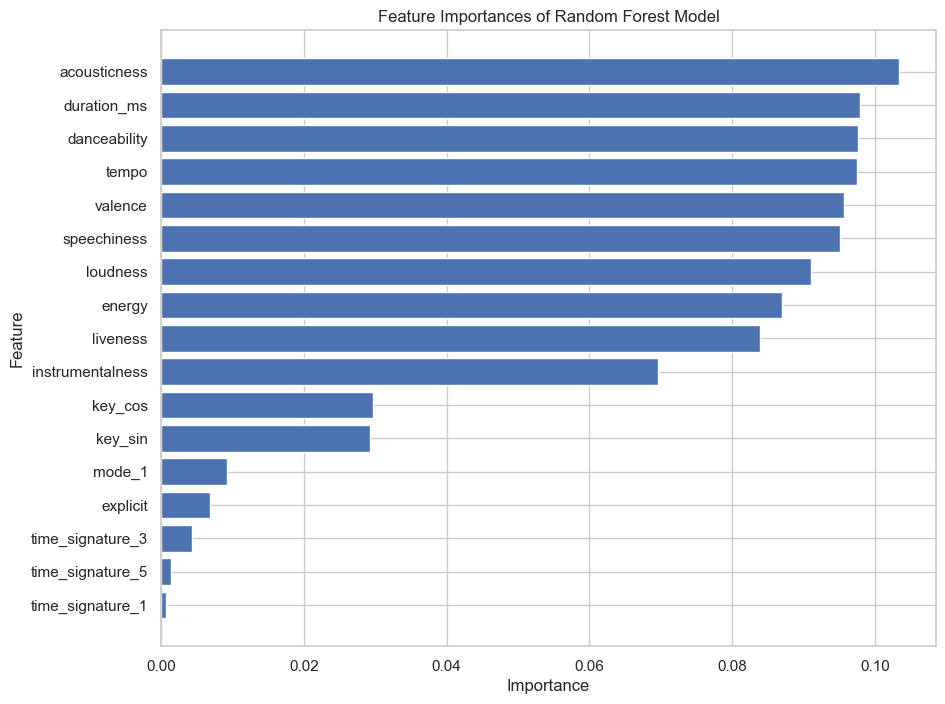

In [87]:
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Model')
plt.gca().invert_yaxis()  #To display the most important feature at the top
plt.show()

### Insights from Feature Importance of the Random Forest Model:

- **Acousticness** is the most influential feature, suggesting a strong relationship with the target variable.
- **Top 5 features** (acousticness, duration_ms, danceability, tempo, valence) are closely matched in importance, indicating a balanced influence on model predictions.
- **Musical properties** dominate the top influential features, highlighting their significance in predicting outcomes.
- **Key_cos and key_sin**, representing key in a cyclic encoding, show moderate importance, suggesting some relevance of musical key.
- **Mode_1, explicit, and time signatures** (3, 5, 1) have minimal impact, hinting at their low predictive power or redundancy with more important features.

_While performing EDA, we noticed that explicit songs contribute to the most popularity but yet it's unable to help in making the prediction of popularity_

But the random forest regressor model is still overfitting, to make it a more generalised model, I will further use the top 10 important features (which contribute most to the model prediction) to further reduce the overfit. 

## Using top 10 features of RF and building RF model again:
_This includes K-fold validation as well_

In [88]:
#Selecting the top 10 features based on importance
top_features = ['acousticness', 'duration_ms', 'danceability', 'tempo', 'valence', 
                'speechiness', 'loudness', 'energy', 'liveness', 'instrumentalness']

#Updating X to only include the top 10 features
X = df[top_features]
y = df['popularity']

In [89]:
#Initialize variables to store metrics and timing for K-Fold validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

train_rmse_scores = []
test_rmse_scores = []
train_r2_scores = []
test_r2_scores = []
times_taken = []

In [90]:
#Looping through each fold
for train_index, test_index in kf.split(X):
    start_time = time.time()
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model = RandomForestRegressor(random_state=0)
    model.fit(X_train, y_train)
    
    #Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Calculating metrics
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_r2_scores.append(r2_score(y_train, y_train_pred))
    test_r2_scores.append(r2_score(y_test, y_test_pred))
    
    #Timing
    end_time = time.time()
    times_taken.append(end_time - start_time)

In [91]:
#Calculating the mean of the metrics and timing
mean_train_rmse = np.mean(train_rmse_scores)
mean_test_rmse = np.mean(test_rmse_scores)
mean_train_r2 = np.mean(train_r2_scores)
mean_test_r2 = np.mean(test_r2_scores)
mean_time = np.mean(times_taken)

#Printing the results
print("Random Forest Model with the 10 important features")
print(f"Mean Train RMSE: {mean_train_rmse:.3f}")
print(f"Mean Test RMSE: {mean_test_rmse:.3f}")
print(f"Mean Train R²: {mean_train_r2:.3f}")
print(f"Mean Test R²: {mean_test_r2:.3f}")
print(f"Mean Time Taken (seconds): {mean_time:.3f}")

Random Forest Model with the 10 important features
Mean Train RMSE: 6.828
Mean Test RMSE: 15.104
Mean Train R²: 0.906
Mean Test R²: 0.541
Mean Time Taken (seconds): 274.852


### Insights from above: 
Even after running the model with the top 10 important features (while removing the noise/less important features), it still shows the same result. The attempt to reduce the overfit failed here. 

# Why are our models performing poorly? 
The reason our models are performing poorly (overfitting and low R² value even after using multiple machine learning models, hyper-parameter tuning and k-fold) could be because of the imbalanced  distribution of the popularity scores. Let's check the distribution graph again:

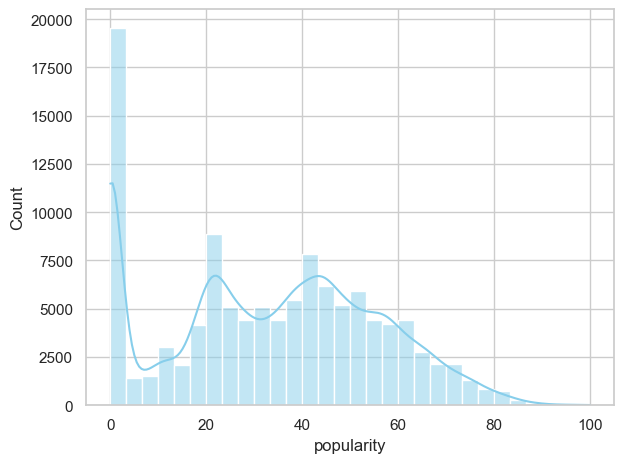

In [92]:
sns.histplot(df['popularity'], kde=True, bins=30, color='skyblue')
plt.tight_layout()
plt.show()

### Insights from above: 
Noticed that the distribution of popularity is not evenly distributed. Higher popularity (>60) is very less in our dataset. Also, noticed that there's a lot of 0 values for popularity.

This issue could be the main reason as to why our regression models were performing poorly. 

# V. Popularity Prediction (Using Classification)

To adress the imbalance of popularity, we can convert them to a classification problem, as follows.

From the shape of the popularity distribution, we can classify the popularity as:

- **Low Popularity**: Scores from 0 to 20 – This captures the large number of songs with very low popularity scores.
- **Medium Popularity**: Scores from 21 to 50 – This seems to include the "body" of the distribution where the bulk of the songs lie.
- **High Popularity**: Scores above 50 – This will capture the tail end of the distribution, which includes songs with higher popularity.

# CONTINUING THE CLASSIFCATION PROBLEM IN THE NEXT NOTEBOOK.

## Saving the Random Forest Model:

In [95]:
import pickle

# Saving the random_forest_model with R² = 0.54 (best model for regression)
filename = 'final_random_forest_model_regression.pkl'
with open(filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

print(f'Model saved to {filename}')

Model saved to final_random_forest_model_regression.pkl


In [97]:
df.to_pickle('cleaneddata.pkl')